# 1. DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(f"The train data size before dropping ID feature is: {train_data.shape}")
print(f"The test data size before dropping ID feature is: {test_data.shape}")

train_ID = train_data['Id']
test_ID = test_data['Id']

train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

print(f"\nThe train data size after dropping feature ID is {train_data.shape}")
print(f"The test data size after dropping feature ID is {test_data.shape}")

The train data size before dropping ID feature is: (1460, 81)
The test data size before dropping ID feature is: (1459, 80)

The train data size after dropping feature ID is (1460, 80)
The test data size after dropping feature ID is (1459, 79)


# 2. DATA PROCESSING

## 2.1 Outliers

Text(0.5, 0, 'GrLivArea')

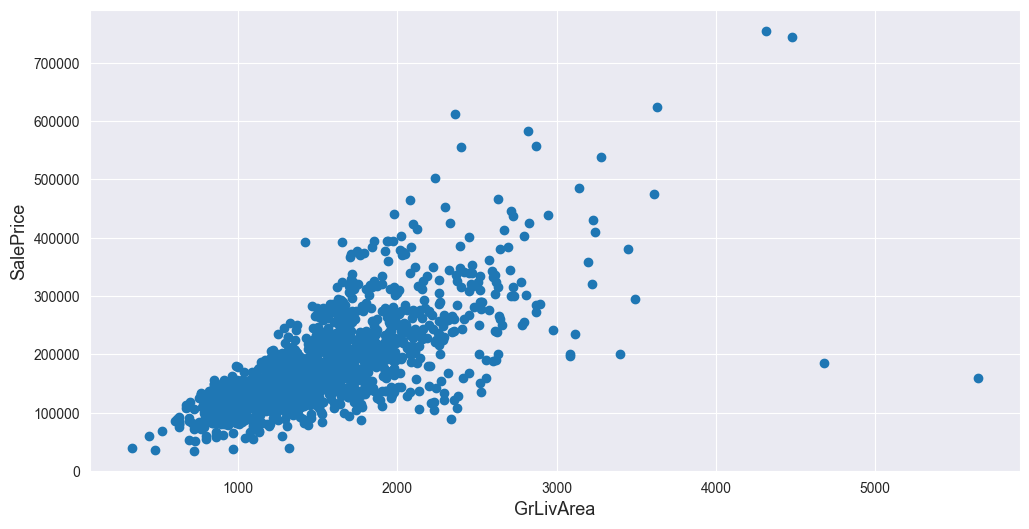

In [6]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)

Text(0.5, 0, 'GrLivArea')

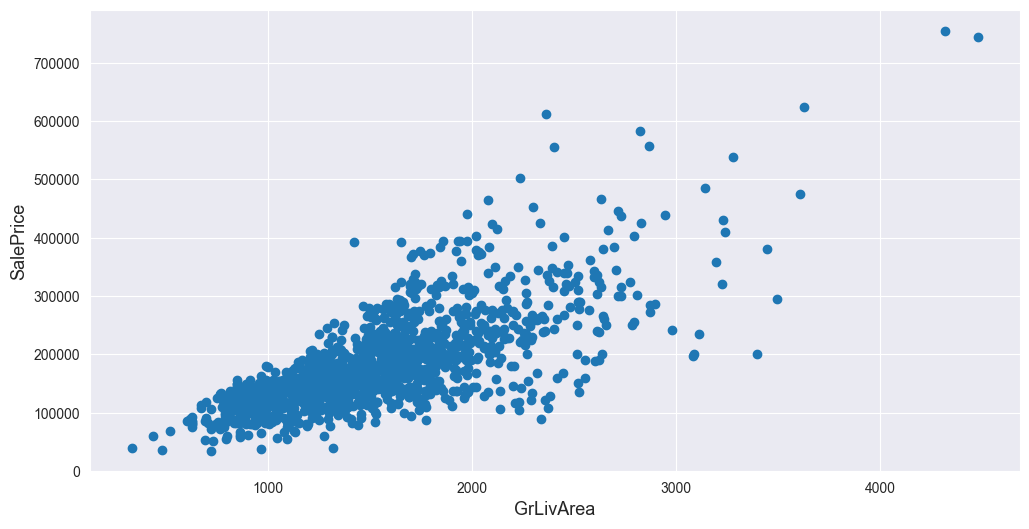

In [7]:
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index)

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)

## 2.2 Target Variable


 mu = 180932.91906721535 and sigma = 79467.78892987774


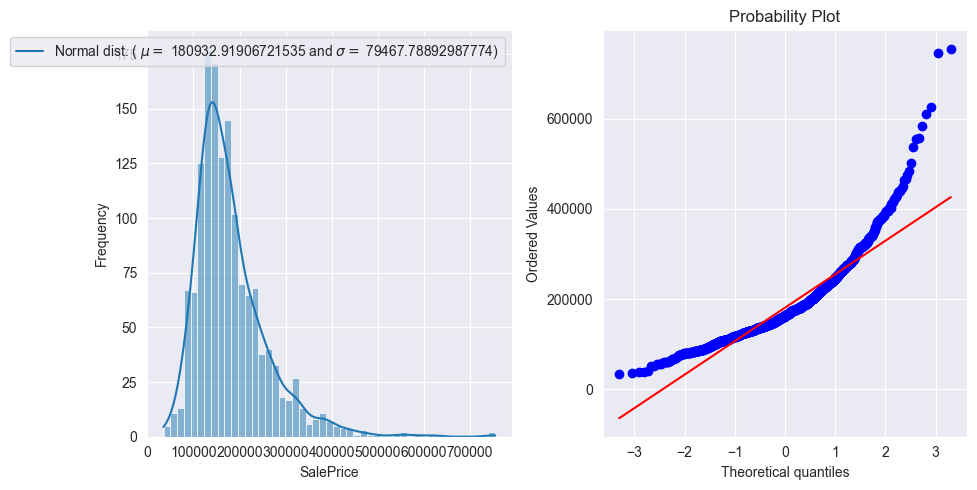

In [8]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5))

ax1 = ax[0]
ax2 = ax[1]

sns.histplot(train_data['SalePrice'], kde=True, ax=ax1)

mu, sigma = norm.fit(train_data['SalePrice'])
print(f'\n mu = {mu} and sigma = {sigma}')
ax1.legend([f'Normal dist. ( $\mu=$ {mu} and $\sigma=$ {sigma})'], loc='best')
ax1.set_xlabel("SalePrice")
ax1.set_ylabel("Frequency")

stats.probplot(train_data['SalePrice'], plot=ax2)

plt.tight_layout()
plt.show()


 mu = 12.024015155682552 and sigma = 0.3995757283645756


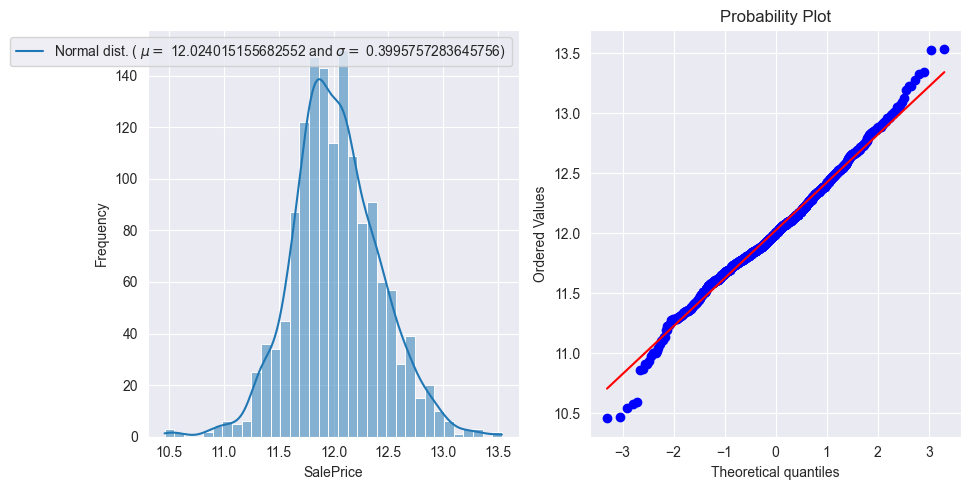

In [9]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

ax1 = ax[0]
ax2 = ax[1]

sns.histplot(train_data['SalePrice'], kde=True, ax=ax1)

mu, sigma = norm.fit(train_data['SalePrice'])
print(f'\n mu = {mu} and sigma = {sigma}')
ax1.legend([f'Normal dist. ( $\mu=$ {mu} and $\sigma=$ {sigma})'], loc='best')
ax1.set_xlabel("SalePrice")
ax1.set_ylabel("Frequency")

stats.probplot(train_data['SalePrice'], plot=ax2)

plt.tight_layout()
plt.show()

## 2.2 Features Engineering

In [10]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

y_train = train_data.SalePrice.values
whole_data = pd.concat((train_data, test_data)).reset_index(drop=True)
whole_data.drop(['SalePrice'], axis=1 ,inplace=True)
whole_data.shape

(2917, 79)

### 2.2.1 Missing Data

In [11]:
all_na_data = (whole_data.isnull().sum() / len(whole_data)) * 100
all_na_data = all_na_data.drop(all_na_data[all_na_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_na_data})
missing_data.head()
len(missing_data)

34

Text(0, 0.5, 'Missing Ratio')

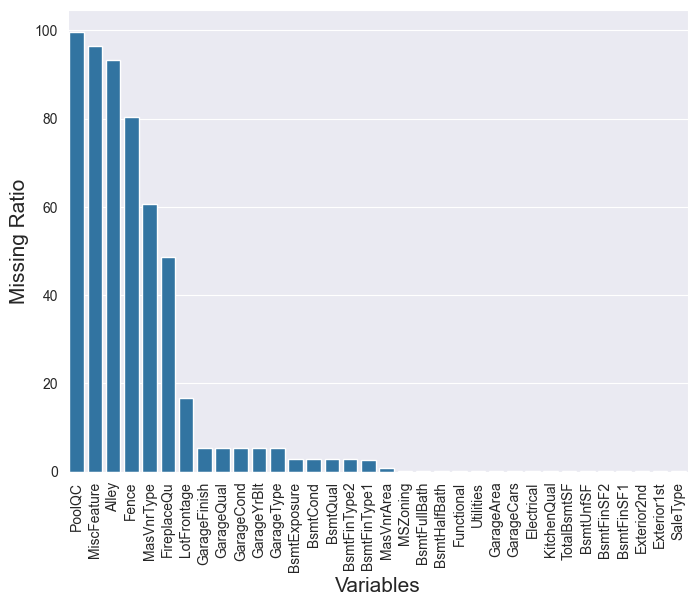

In [12]:
fig ,ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='vertical')
sns.barplot(x=all_na_data.index, y=all_na_data)
plt.xlabel('Variables',fontsize=15)
plt.ylabel('Missing Ratio',fontsize=15)

<Axes: >

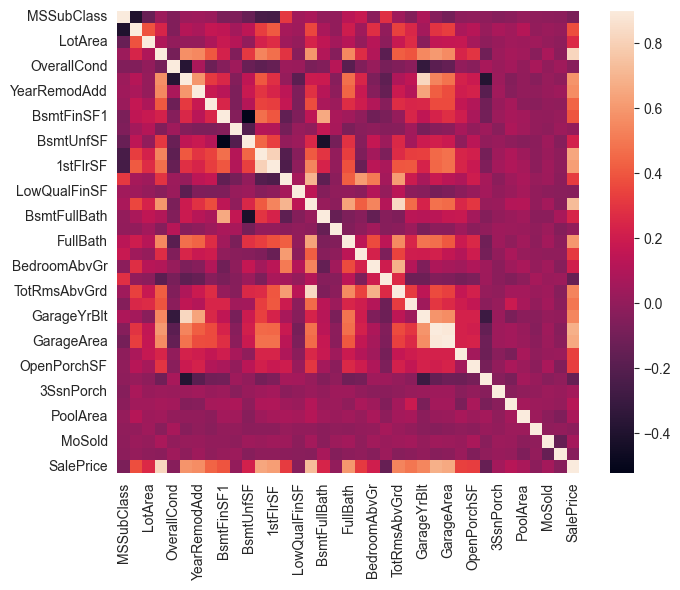

In [13]:
corr_matrix = train_data.select_dtypes(include=['int64','float64']).corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

In [14]:
# Imputing missing values

In [15]:
whole_data["PoolQC"] = whole_data["PoolQC"].fillna("None")

In [16]:
whole_data["MiscFeature"] = whole_data["MiscFeature"].fillna("None")

In [17]:
whole_data["Alley"] = whole_data["Alley"].fillna("None")

In [18]:
whole_data["Fence"] = whole_data["Fence"].fillna("None")

In [19]:
whole_data["FireplaceQu"] = whole_data["FireplaceQu"].fillna("None")

In [20]:
whole_data["LotFrontage"] = whole_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

In [21]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    whole_data[col] = whole_data[col].fillna('None')

In [22]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    whole_data[col] = whole_data[col].fillna(0)

In [23]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    whole_data[col] = whole_data[col].fillna(0)

In [24]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    whole_data[col] = whole_data[col].fillna('None')

In [25]:
whole_data["MasVnrType"] = whole_data["MasVnrType"].fillna("None")
whole_data["MasVnrArea"] = whole_data["MasVnrArea"].fillna(0)

In [26]:
whole_data["MSZoning"] = whole_data["MSZoning"].fillna(whole_data["MSZoning"].mode()[0])

In [27]:
whole_data = whole_data.drop(["Utilities"], axis=1)

In [28]:
whole_data["Functional"] = whole_data["Functional"].fillna("Typ")

In [29]:
whole_data["Electrical"] = whole_data["Electrical"].fillna(whole_data["Electrical"].mode()[0])

In [30]:
whole_data["KitchenQual"] = whole_data["KitchenQual"].fillna(whole_data["KitchenQual"].mode()[0])

In [31]:
whole_data["Exterior1st"] = whole_data["Exterior1st"].fillna(whole_data["Exterior1st"].mode()[0])
whole_data["Exterior2nd"] = whole_data["Exterior2nd"].fillna(whole_data["Exterior2nd"].mode()[0])

In [32]:
whole_data["SaleType"] = whole_data["SaleType"].fillna(whole_data["SaleType"].mode()[0])

In [33]:
whole_data["MSSubClass"] = whole_data["MSSubClass"].fillna("None")

In [34]:
whole_data_na = (whole_data.isnull().sum() / len(whole_data)) * 100
whole_data_na = whole_data_na.drop(whole_data_na[whole_data_na == 0].index).sort_values(ascending=True)

missing_data = pd.DataFrame({"Missing Ratio": whole_data_na})
missing_data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [35]:
whole_data["MSSubClass"] = whole_data["MSSubClass"].apply(str)
whole_data["MSSubClass"] = whole_data["MSSubClass"].astype(str)

whole_data["YrSold"] = whole_data["YrSold"].astype(str)
whole_data["MoSold"] = whole_data["MoSold"].astype(str)

In [36]:
whole_data["MSSubClass"].unique().tolist()

['60',
 '20',
 '70',
 '50',
 '190',
 '45',
 '90',
 '120',
 '30',
 '85',
 '80',
 '160',
 '75',
 '180',
 '40',
 '150']

In [37]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(whole_data[c].values))
    whole_data[c] = lbl.transform(list(whole_data[c].values))

print(f'Shape whole_data: {whole_data.shape}')

Shape whole_data: (2917, 78)


In [38]:
whole_data["TotalSF"] = whole_data["TotalBsmtSF"] + whole_data["1stFlrSF"] + whole_data["2ndFlrSF"]

In [39]:
numeric_feats = whole_data.dtypes[whole_data.dtypes != "object"].index

skew_feats = whole_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print(f"\nSkew in numerical features: \n")

skewness = pd.DataFrame({"Skew": skew_feats})

skewness.head()


Skew in numerical features: 



Skew
MiscVal       21.939672
PoolArea      17.688664
LotArea       13.109495
LowQualFinSF  12.084539
3SsnPorch     11.372080

In [40]:
skewness = skewness[abs(skewness) > 0.75]

print(f"There are {skewness.shape[0]} skewed numerical variables for Box cox transformation")

from scipy.special import boxcox1p
skewed_feats = skewness.index
lam = 0.15
for feat in skewed_feats:
    whole_data[feat] = boxcox1p(whole_data[feat], lam)


There are 59 skewed numerical variables for Box cox transformation


In [41]:
whole_data = pd.get_dummies(whole_data)
print(whole_data.shape)

(2917, 220)


In [42]:
train = whole_data[:ntrain]
test = whole_data[ntrain:]

# 3. MODELLING

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## 3.1 Base models

In [44]:
n_fold = 5

def rmsle_cv(model):
    kf = KFold(n_fold, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [45]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [46]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

In [47]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [48]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [50]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [51]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [52]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [53]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [59]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1168 (0.0084)



In [63]:
train.index

RangeIndex(start=0, stop=1458, step=1)

In [65]:
def rmsle_cv2(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    rmsle_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rmsle = np.sqrt(np.mean((np.log1p(preds) - np.log1p(y_test)) ** 2))
        rmsle_scores.append(rmsle)
    
    return np.array(rmsle_scores)

score = rmsle_cv2(model_xgb,train,y_train)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0091 (0.0006)



In [56]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_le

## 3.2 Stacking models

In [66]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [67]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



In [68]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [69]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


## 3.3 Ensembling models

In [70]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [71]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0784498159526798


In [72]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08655579912824363


In [73]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignor

In [74]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07652498816293549


In [75]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [76]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)